# Clear Sky Detection Demonstration

This notebook demonstrates how to detect and label clear sky periods in measured PV power data. Under the hood, this module uses both quantile fitting and loss factor estimation, before applying a dynamic programming algorithms to label the points.

In [7]:
from solardatatools import DataHandler
from solardatatools.dataio import get_pvdaq_data
import matplotlib.pyplot as plt

In [2]:
data_frame = get_pvdaq_data(sysid=34, year=range(2011, 2015), api_key="DEMO_KEY")

[============================================================] 100.0% ...queries complete in 3.9 seconds       



In [3]:
dh = DataHandler(data_frame)
dh.run_pipeline(power_col="ac_power")


            *********************************************
            * Solar Data Tools Data Onboarding Pipeline *
            *********************************************

            This pipeline runs a series of preprocessing, cleaning, and quality
            control tasks on stand-alone PV power or irradiance time series data.
            After the pipeline is run, the data may be plotted, filtered, or
            further analyzed.

            Authors: Bennet Meyers and Sara Miskovich, SLAC

            (Tip: if you have a mosek [https://www.mosek.com/] license and have it
            installed on your system, try setting solver='MOSEK' for a speedup)

            This material is based upon work supported by the U.S. Department
            of Energy's Office of Energy Efficiency and Renewable Energy (EERE)
            under the Solar Energy Technologies Office Award Number 38529.

            


task list: 100%|██████████████████████████████████| 7/7 [00:10<00:00,  1.43s/it]



total time: 10.02 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              2.25s
Cleaning                   0.12s
Filtering/Summarizing      7.65s
    Data quality           0.09s
    Clear day detect       0.16s
    Clipping detect        3.38s
    Capacity change detect 4.02s



In [4]:
dh.detect_clear_sky(nvals_dil=31, regularization=1)

100%|█████████████████████████████████████████████| 1/1 [01:06<00:00, 66.03s/it]



            ************************************************
            * Solar Data Tools Degradation Estimation Tool *
            ************************************************

            Monte Carlo sampling to generate a distributional estimate
            of the degradation rate [%/yr]

            The distribution typically stabilizes in 50-100 samples.

            Author: Bennet Meyers, SLAC

            This material is based upon work supported by the U.S. Department
            of Energy's Office of Energy Efficiency and Renewable Energy (EERE)
            under the Solar Energy Technologies Office Award Number 38529.

            


10it [00:36,  4.05s/it]

P50, P02.5, P97.5: -1.551, -1.720, -1.278
changes: -7.074e-02, 0.000e+00, 0.000e+00


20it [01:14,  3.69s/it]

P50, P02.5, P97.5: -1.559, -1.787, -0.970
changes: -3.958e-03, 0.000e+00, 0.000e+00


30it [01:53,  3.83s/it]

P50, P02.5, P97.5: -1.487, -1.820, -0.860
changes: -1.532e-02, 8.819e-04, -2.950e-03


40it [02:30,  3.63s/it]

P50, P02.5, P97.5: -1.487, -1.822, -0.890
changes: 5.352e-03, 3.894e-05, -2.950e-03


42it [02:42,  3.87s/it]


Performing loss factor analysis...

                    ***************************************
                    * Solar Data Tools Loss Factor Report *
                    ***************************************

                    degradation rate [%/yr]:                    -1.496
                    deg. rate 95% confidence:          [-1.822, -0.899]
                    total energy loss [kWh]:              -226790170.8
                    bulk deg. energy loss (gain) [kWh]:    -30494094.5
                    soiling energy loss [kWh]:             -27994898.6
                    capacity change energy loss [kWh]:         -2344.1
                    weather energy loss [kWh]:            -116476668.7
                    system outage loss [kWh]:              -51822164.9
                    


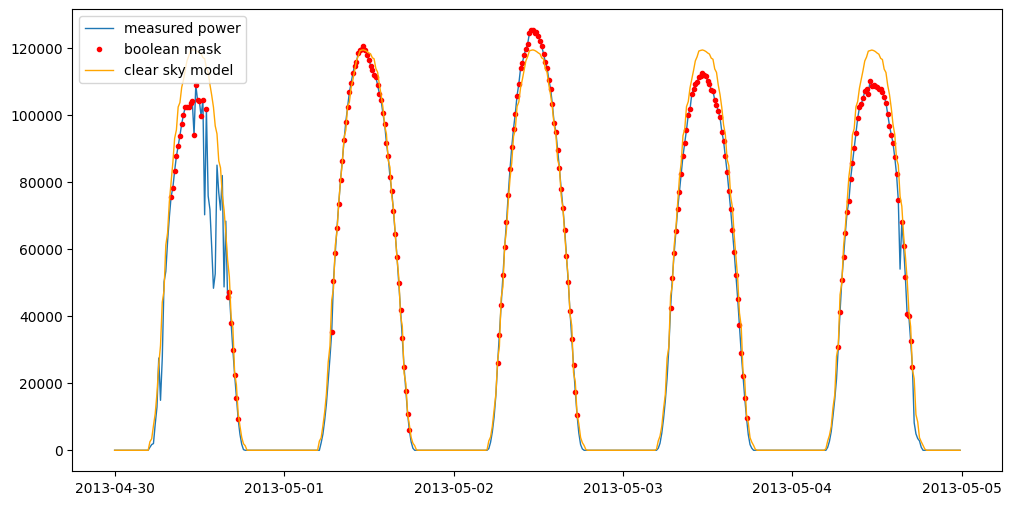

In [9]:
dh.plot_daily_signals(
    boolean_mask=dh.boolean_masks.clear_times, 
    show_clear_model=True, 
    start_day=850
)
plt.legend();